In [32]:
# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [4]:
# reading the data
df = pd.read_csv('/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv')
df.head()

Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0

In [5]:
# dropping unnamed columne
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
#reading the descreption file
des = pd.read_csv('/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv')
des

Unnamed: 0 Column Names                       Explanation
0           0        State                             State
1           1         Year                              Year
2           2         Rape                 No. of Rape cases
3           3          K&A                Kidnap And Assault
4           4           DD                      Dowry Deaths
5           5          AoW             Assault against women
6           6          AoM  Assault against modesty of women
7           7           DV                 Domestic violence
8           8           WT                 Women Trafficking

In [7]:
# rename the columns name
df.columns = des['Explanation']
df.head()

Explanation              State  Year  No. of Rape cases  Kidnap And Assault  \
0               ANDHRA PRADESH  2001                871                 765   
1            ARUNACHAL PRADESH  2001                 33                  55   
2                        ASSAM  2001                817                1070   
3                        BIHAR  2001                888                 518   
4                 CHHATTISGARH  2001                959                 171   

Explanation  Dowry Deaths  Assault against women  \
0                     420                   3544   
1                       0                     78   
2                      59                    850   
3                     859                    562   
4                      70                   1763   

Explanation  Assault against modesty of women  Domestic violence  \
0                                        2271               5791   
1                                           3                 11   
2                                           4               1248   
3                                          21               1558   
4                                         161                840   

Explanation  Women Trafficking  
0                            7  
1                            0  
2                            0  
3                           83  
4                            0

In [8]:
# Descriptive analysis
df.describe()

Explanation         Year  No. of Rape cases  Kidnap And Assault  Dowry Deaths  \
count         736.000000         736.000000          736.000000    736.000000   
mean         2011.149457         727.855978         1134.542120    215.692935   
std             6.053453         977.024945         1993.536828    424.927334   
min          2001.000000           0.000000            0.000000      0.000000   
25%          2006.000000          35.000000           24.750000      1.000000   
50%          2011.000000         348.500000          290.000000     29.000000   
75%          2016.000000        1069.000000         1216.000000    259.000000   
max          2021.000000        6337.000000        15381.000000   2524.000000   

Explanation  Assault against women  Assault against modesty of women  \
count                   736.000000                        736.000000   
mean                   1579.115489                        332.722826   
std                    2463.962518                        806.024551   
min                       0.000000                          0.000000   
25%                      34.000000                          3.000000   
50%                     387.500000                         31.000000   
75%                    2122.250000                        277.500000   
max                   14853.000000                       9422.000000   

Explanation  Domestic violence  Women Trafficking  
count               736.000000         736.000000  
mean               2595.078804          28.744565  
std                4042.004953          79.999660  
min                   0.000000           0.000000  
25%                  13.000000           0.000000  
50%                 678.500000           0.000000  
75%                3545.000000          15.000000  
max               23278.000000         549.000000

In [9]:
# Checking null values
df.isna().sum()

Explanation
State                               0
Year                                0
No. of Rape cases                   0
Kidnap And Assault                  0
Dowry Deaths                        0
Assault against women               0
Assault against modesty of women    0
Domestic violence                   0
Women Trafficking                   0
dtype: int64

In [10]:
# converting states to title case
df['State'] = df['State'].apply(lambda state: state.title())

In [11]:
# cleaning states
def clean_states(state):
    if(state == 'D & N Haveli'):
        return 'D&N Haveli'
    elif state == "Delhi Ut":
        return 'Delhi'
    else:
        return state
df['State'] = df['State'].apply(clean_states)

In [12]:
# List of all states
print(list(df['State'].unique()))

['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'A & N Islands', 'Chandigarh', 'D&N Haveli', 'Daman & Diu', 'Lakshadweep', 'Puducherry', 'Telangana', 'Delhi']


In [13]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

#### Exploratory Data Analysis

In [ ]:
# Group by Year and sum the crime cases
year_wise_data = df.groupby('Year')[
    [
        'No. of Rape cases', 
        'Kidnap And Assault', 
        'Dowry Deaths', 
        'Assault against women', 
        'Assault against modesty of women',
        'Domestic violence',
        'Women Trafficking'
    ]
].sum().reset_index()

# Set the plot style and figure size
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Define markers and colors for different lines
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X']
colors = sns.color_palette("tab10", n_colors=len(year_wise_data.columns[1:])) + ['grey']

# Plotting each crime type with a different line and marker
for idx, crime in enumerate(year_wise_data.columns[1:-1]):  # Exclude 'Total Cases'
    sns.lineplot(data=year_wise_data, x='Year', y=crime, label=crime,
                 marker=markers[idx % len(markers)], color=colors[idx % len(colors)], linewidth=2.5)

# Customize the plot
plt.title('Trend Analysis of Various Crimes Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cases', fontsize=14, fontweight='bold')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to make room for the legend

# Show the plot
plt.show()


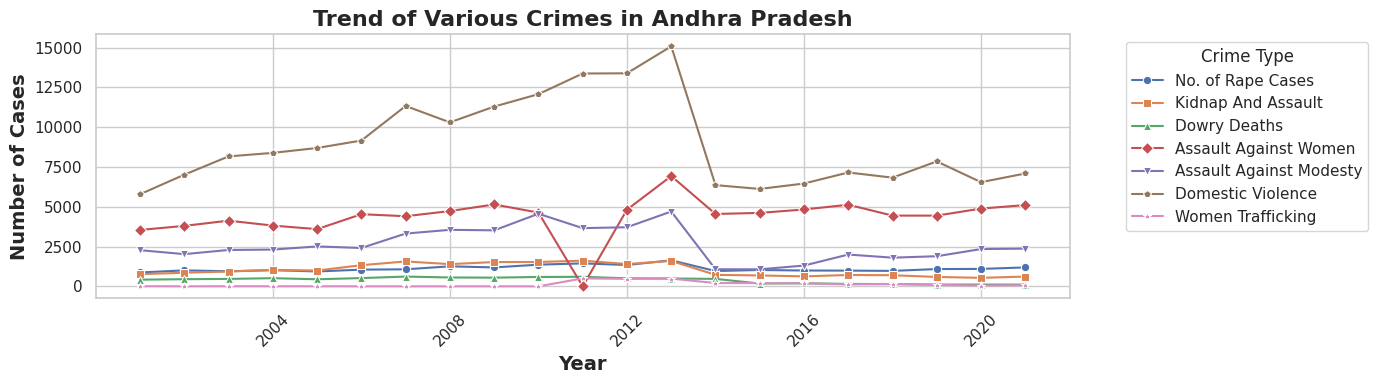

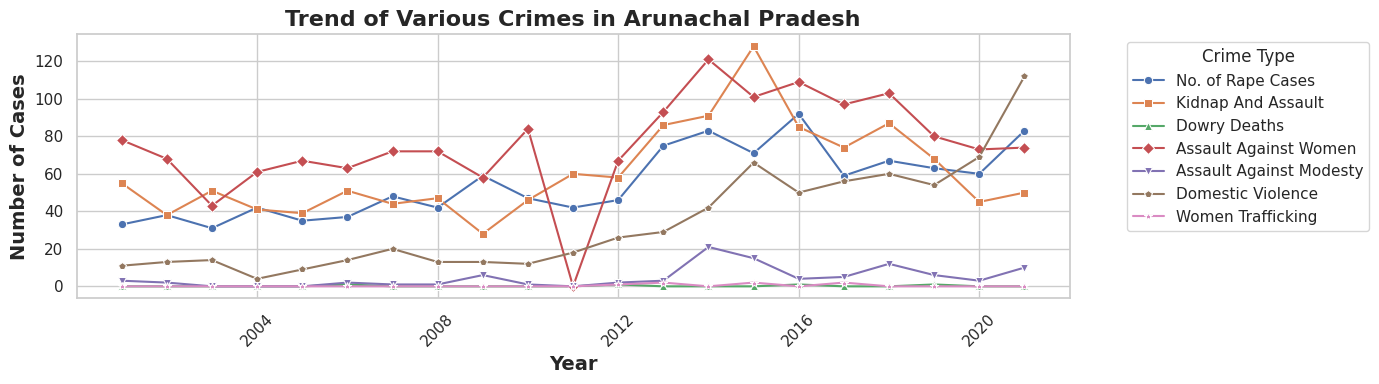

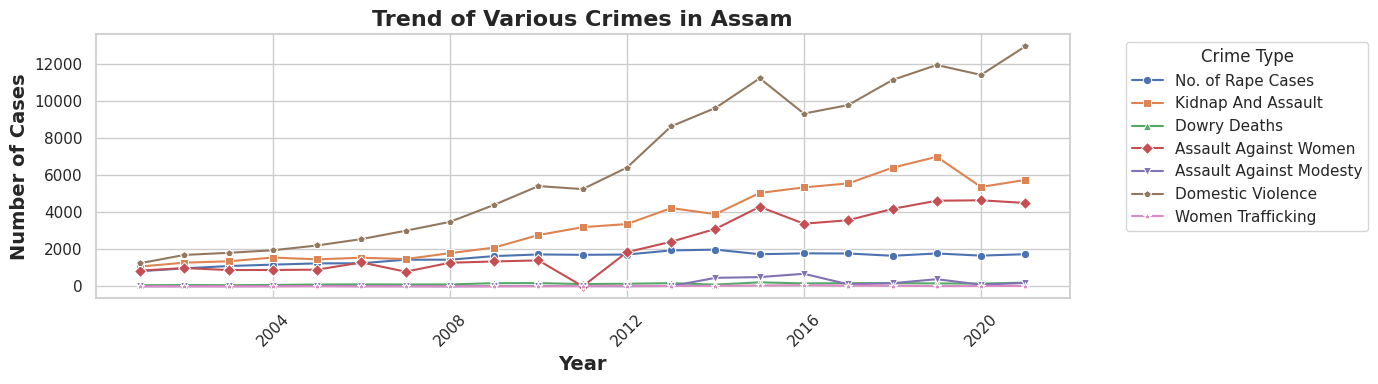

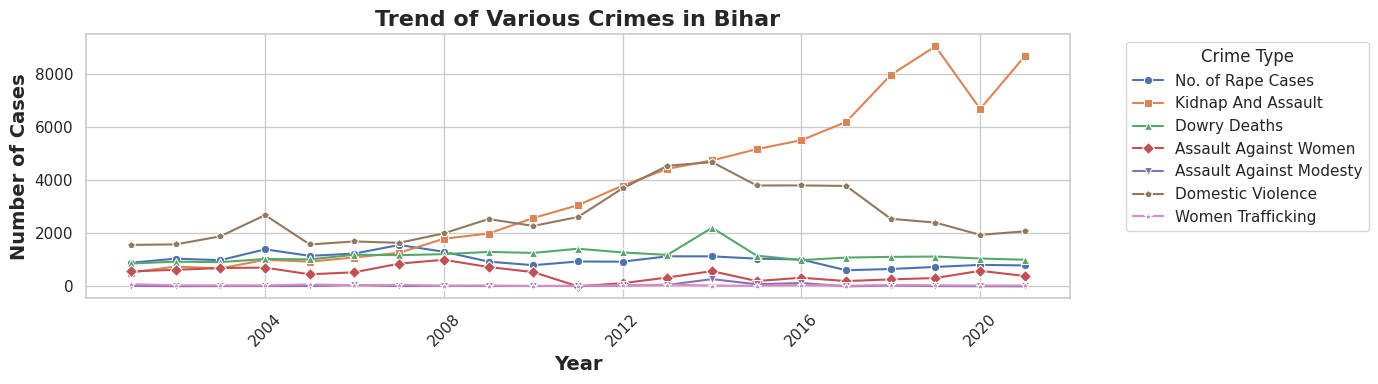

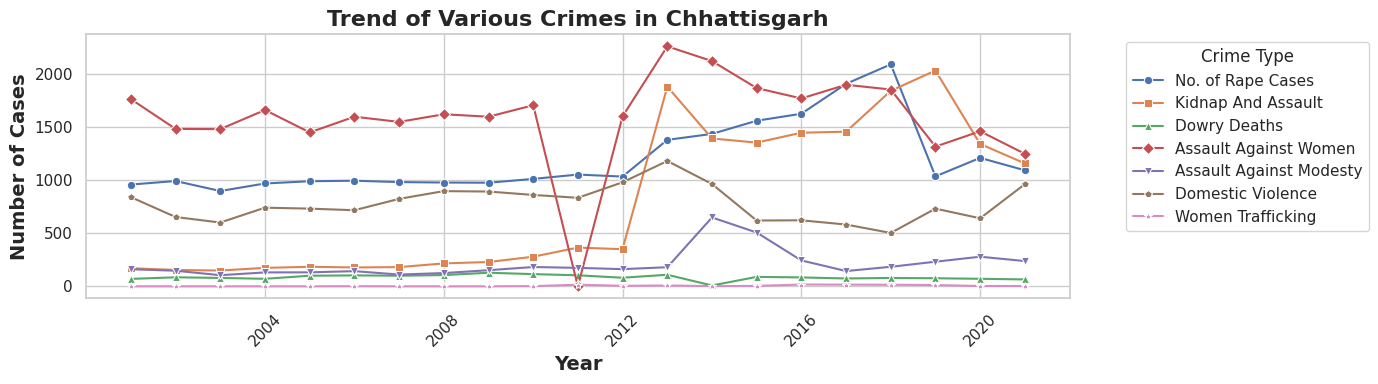

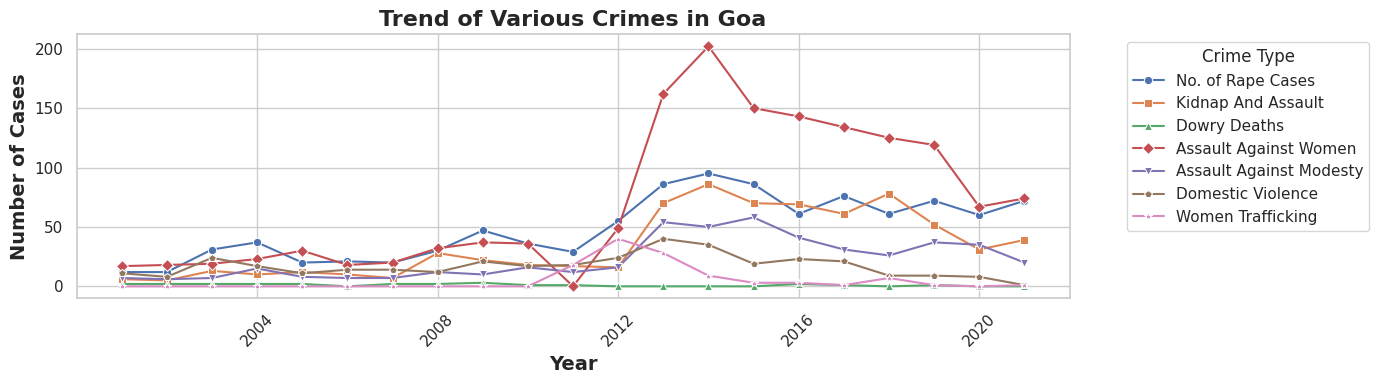

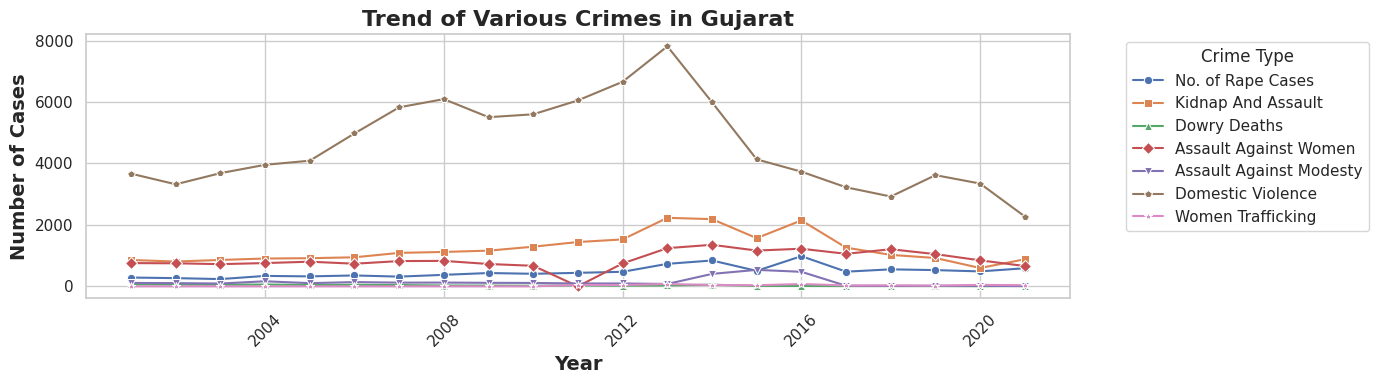

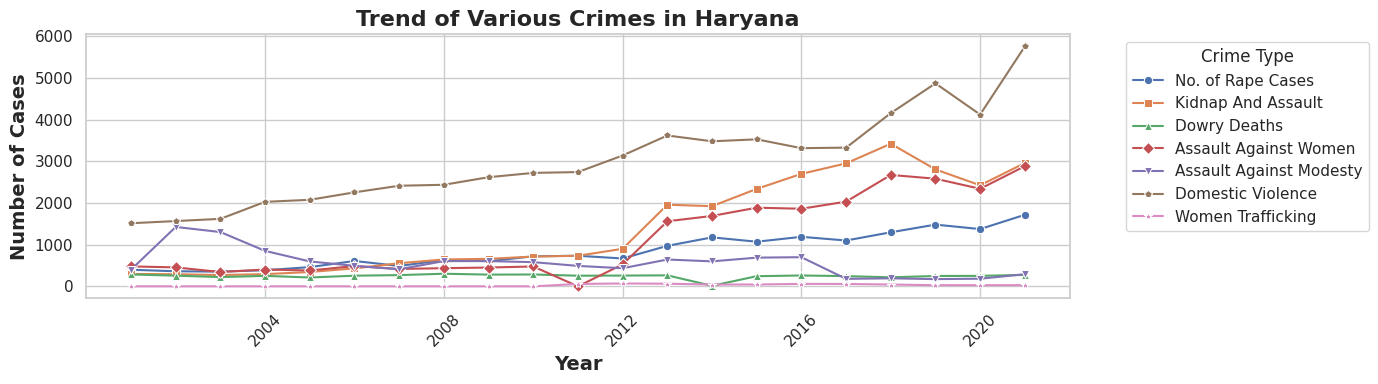

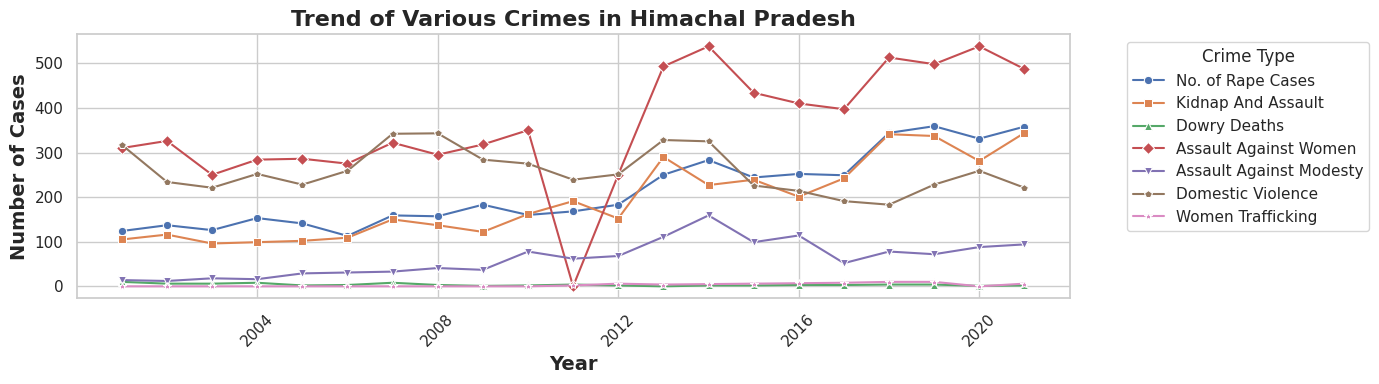

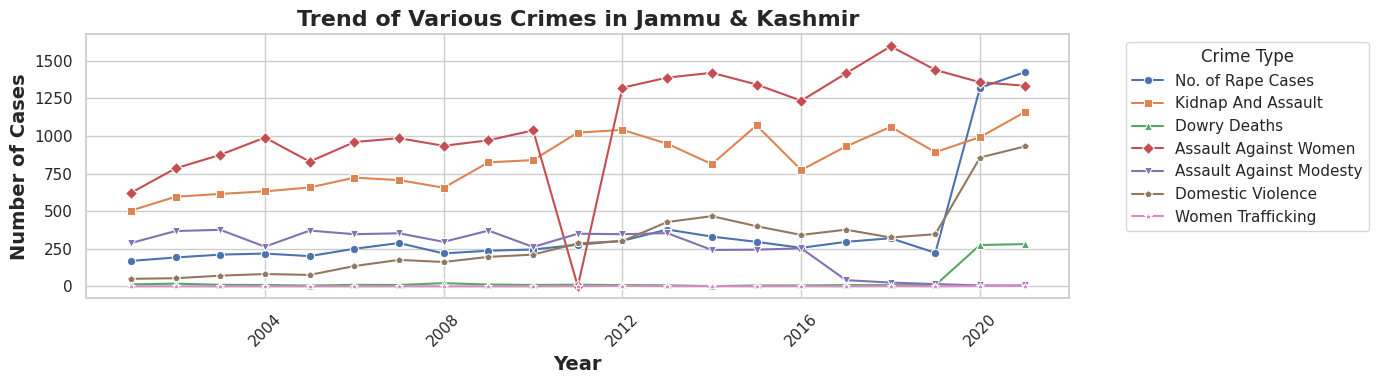

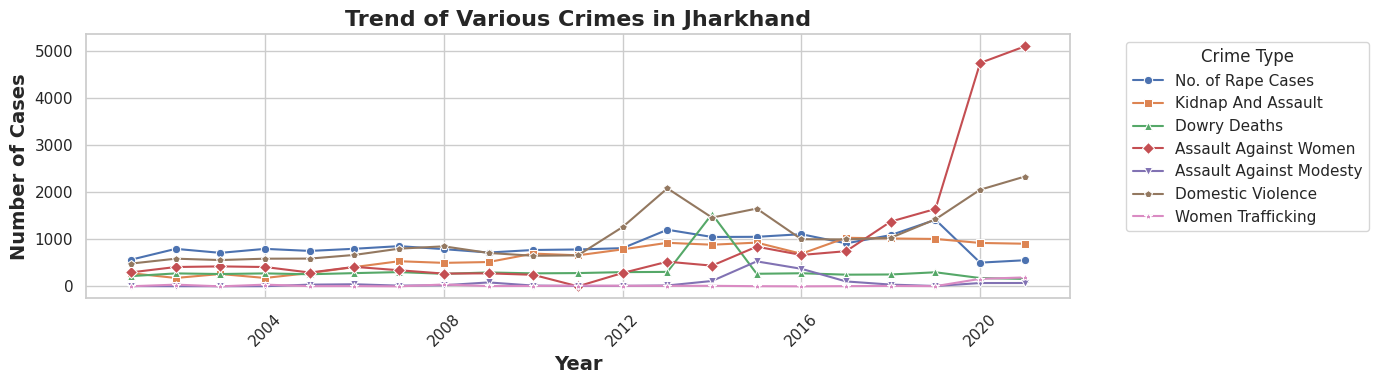

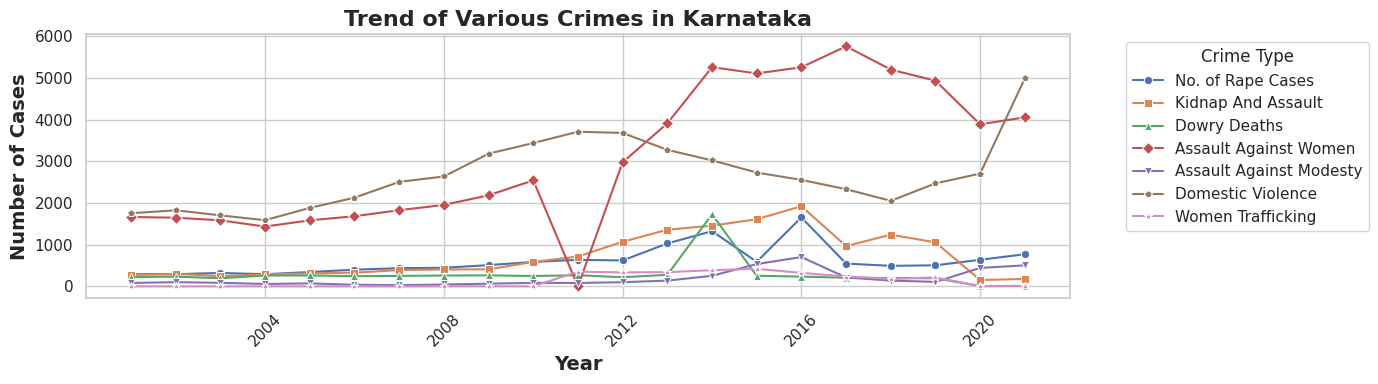

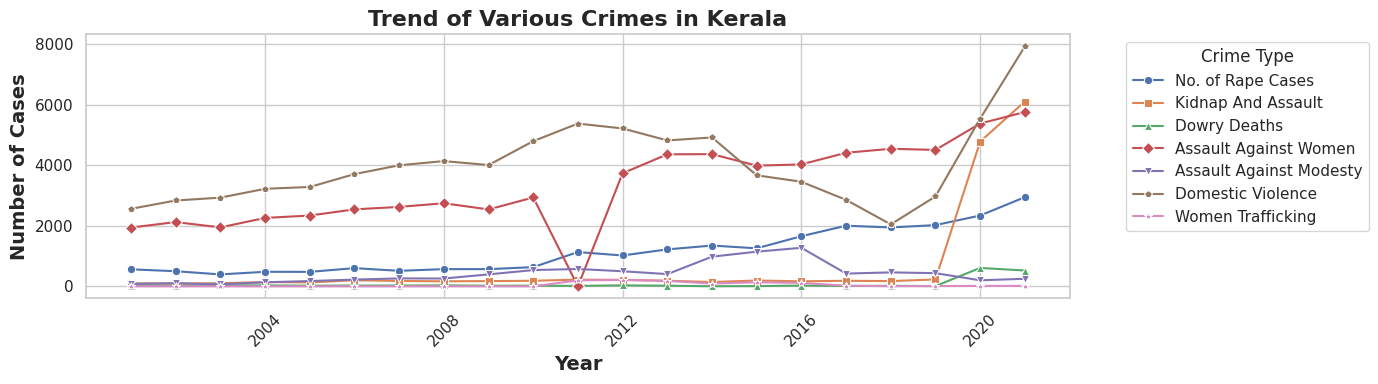

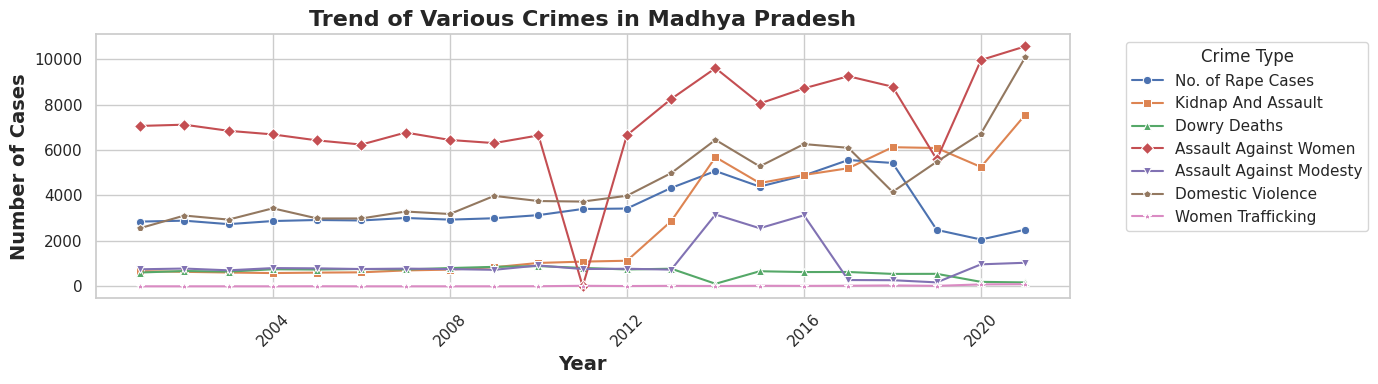

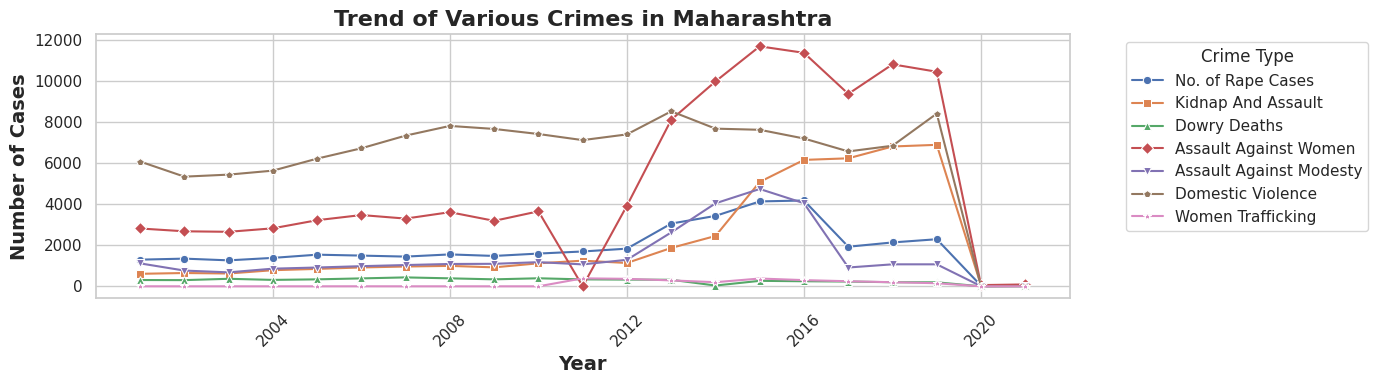

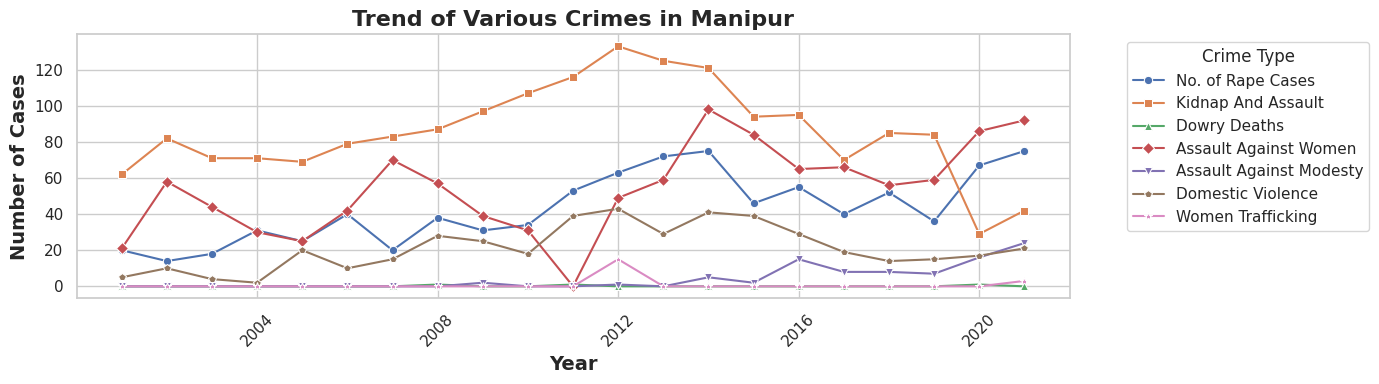

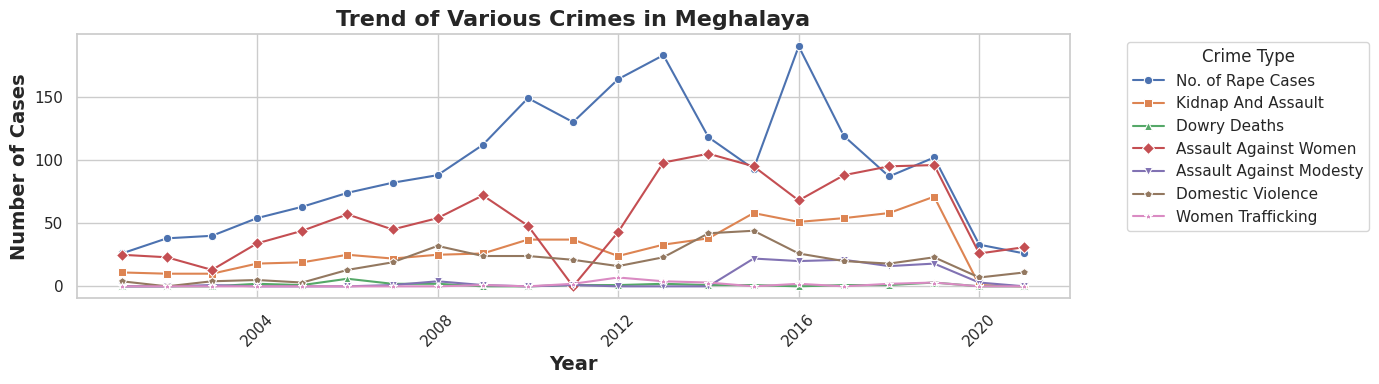

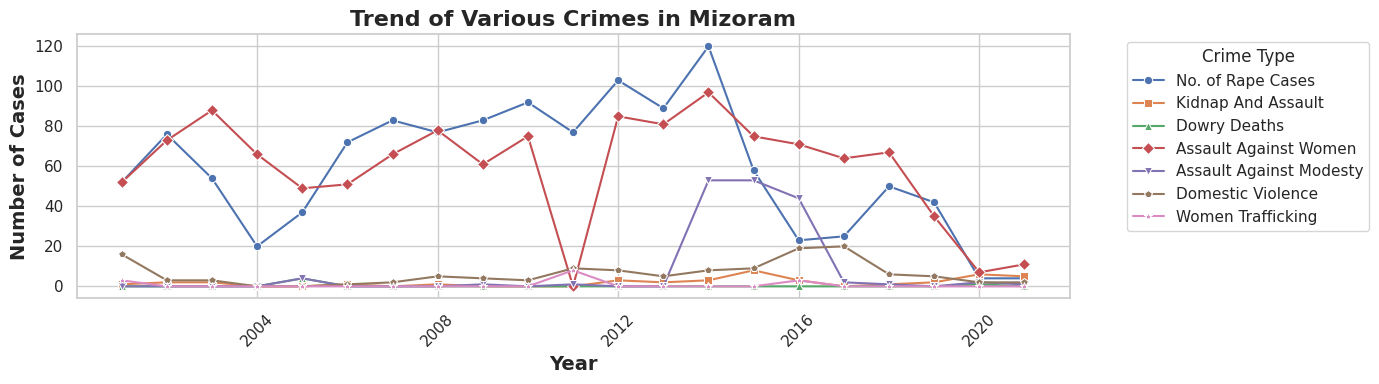

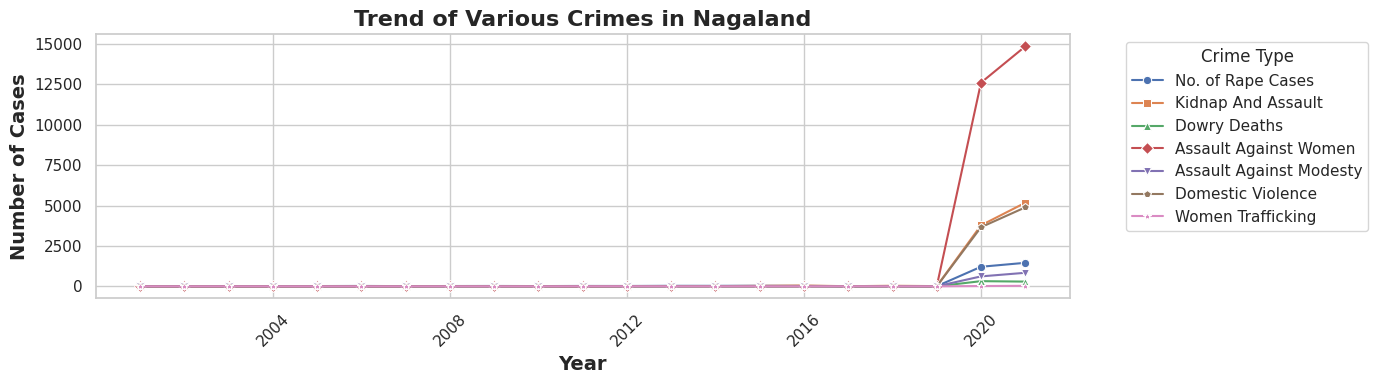

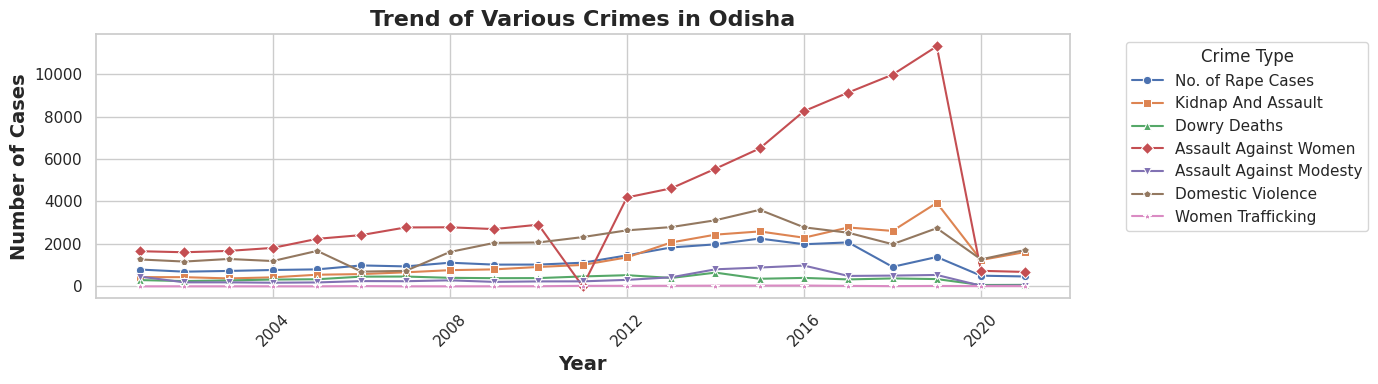

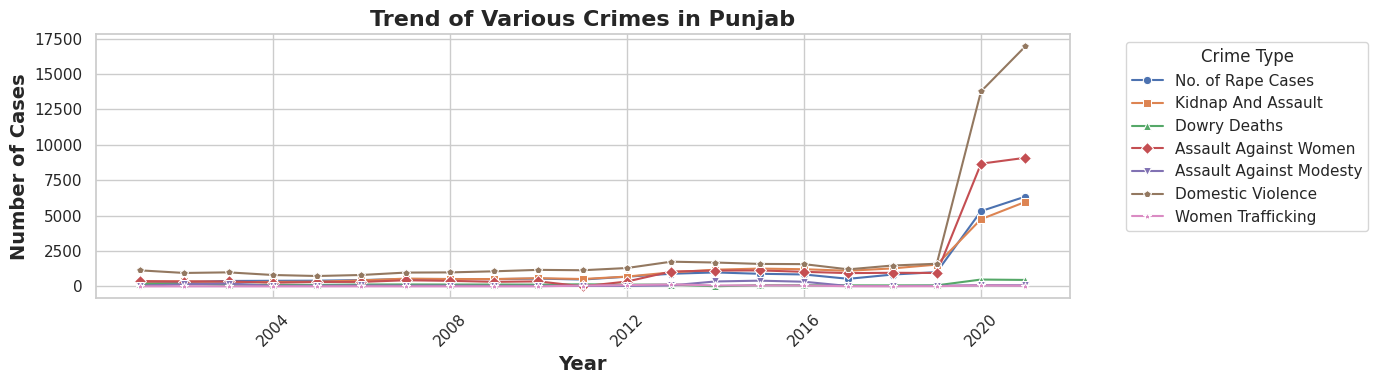

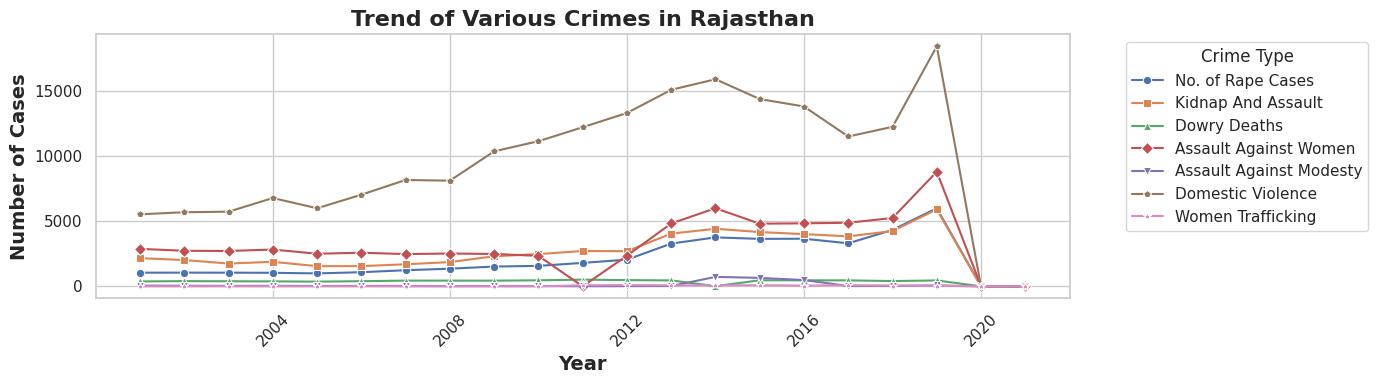

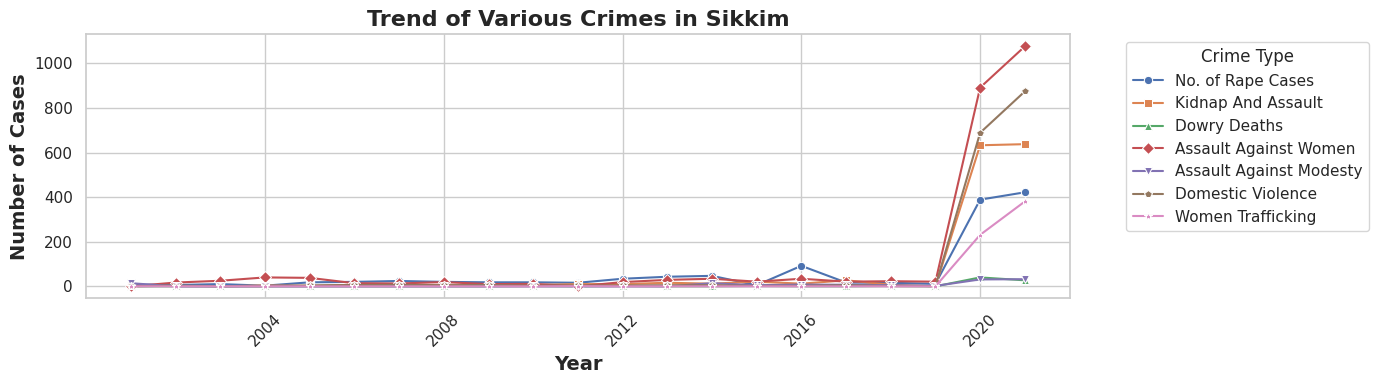

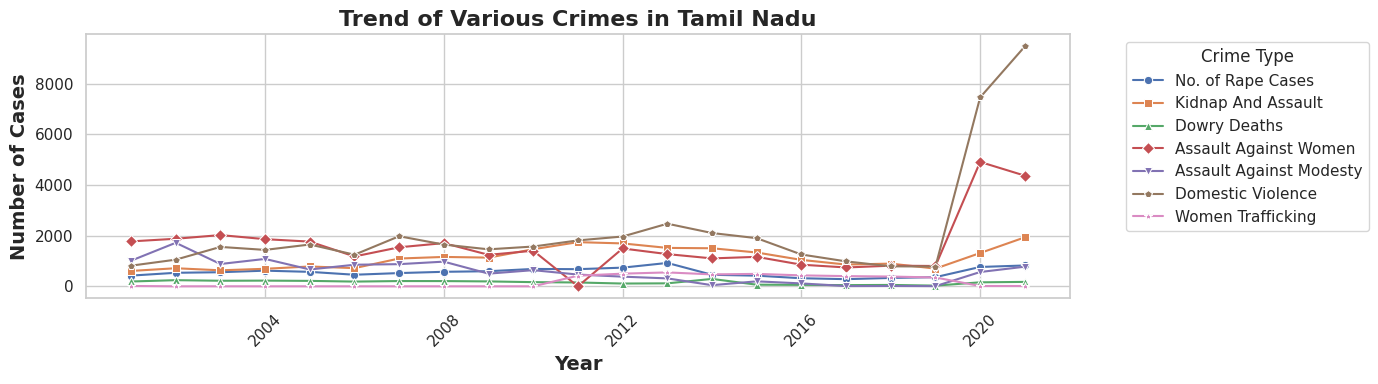

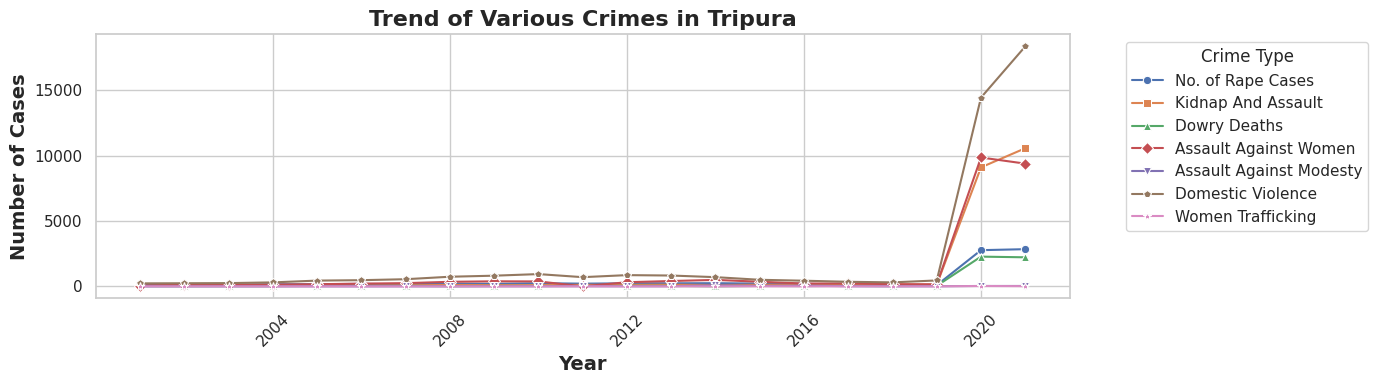

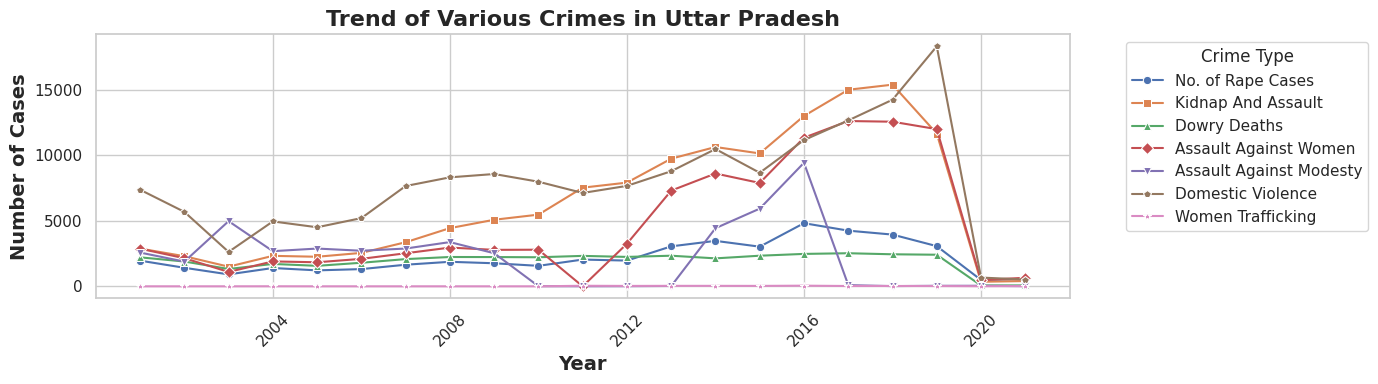

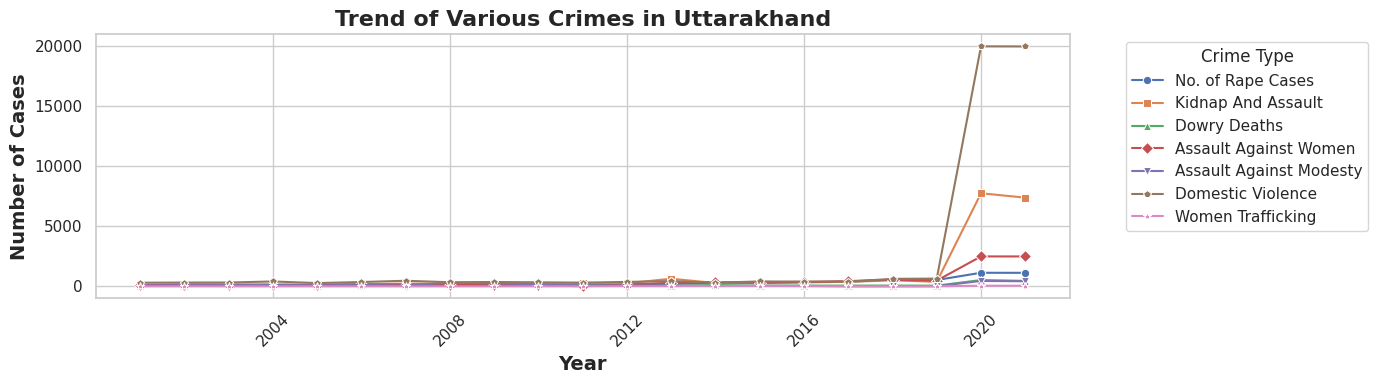

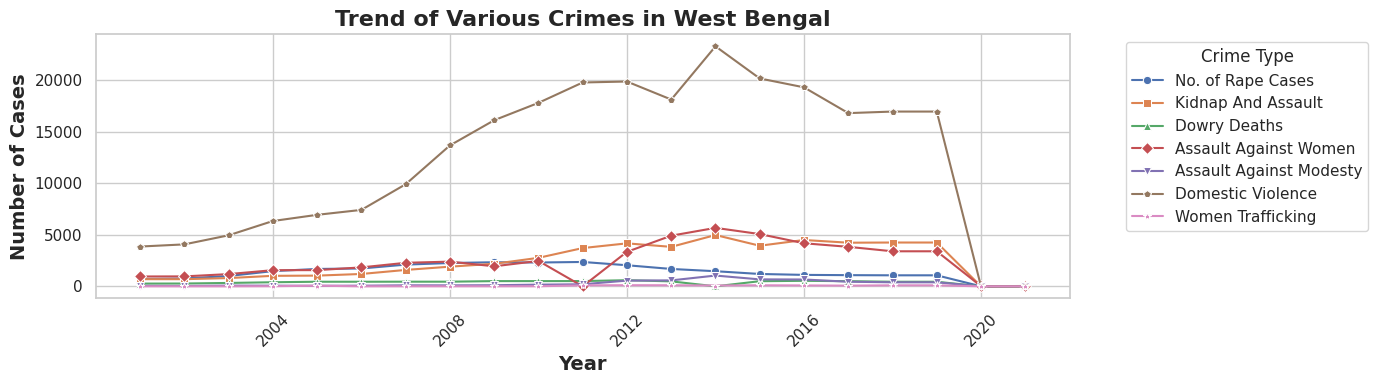

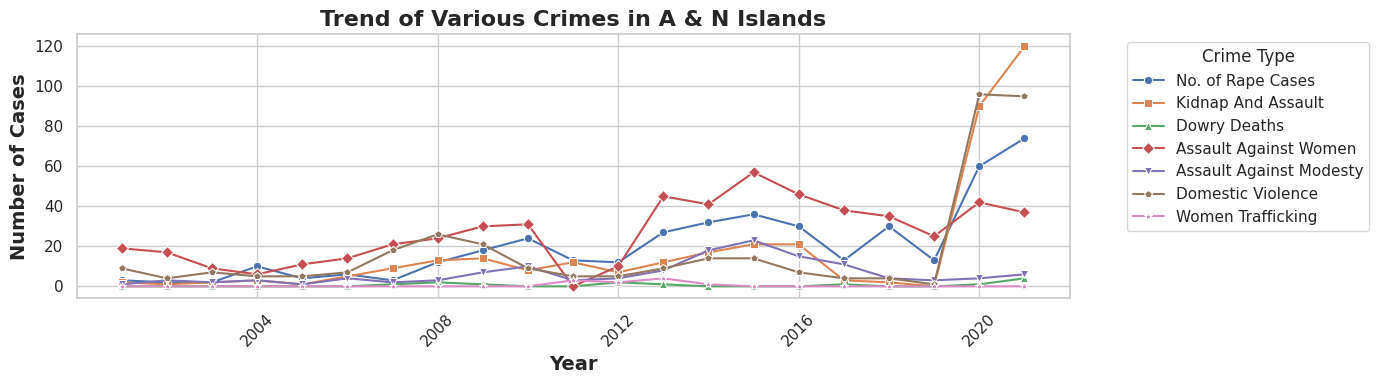

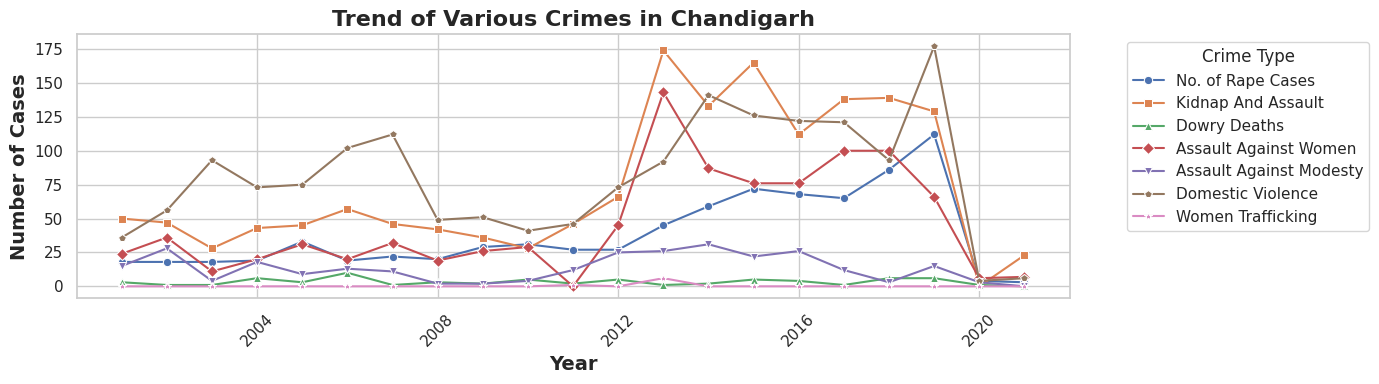

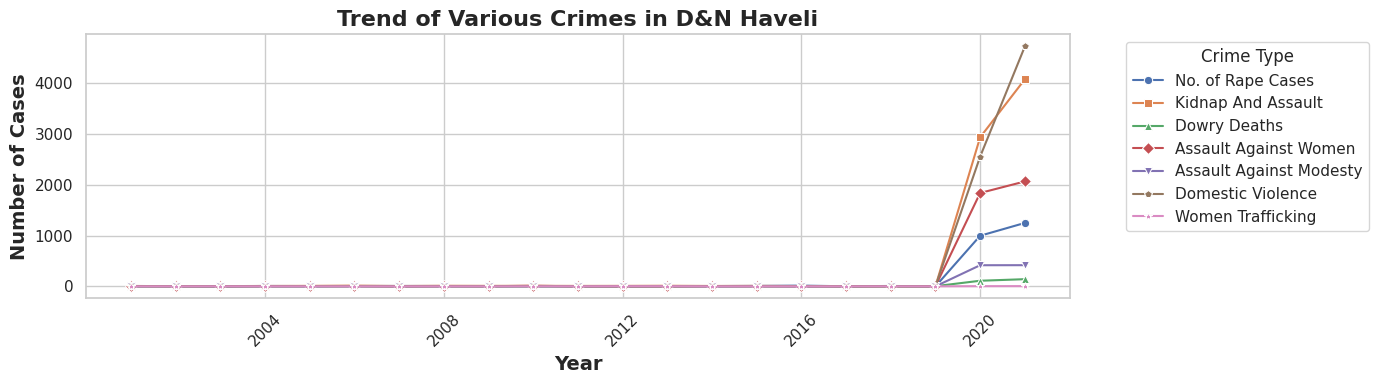

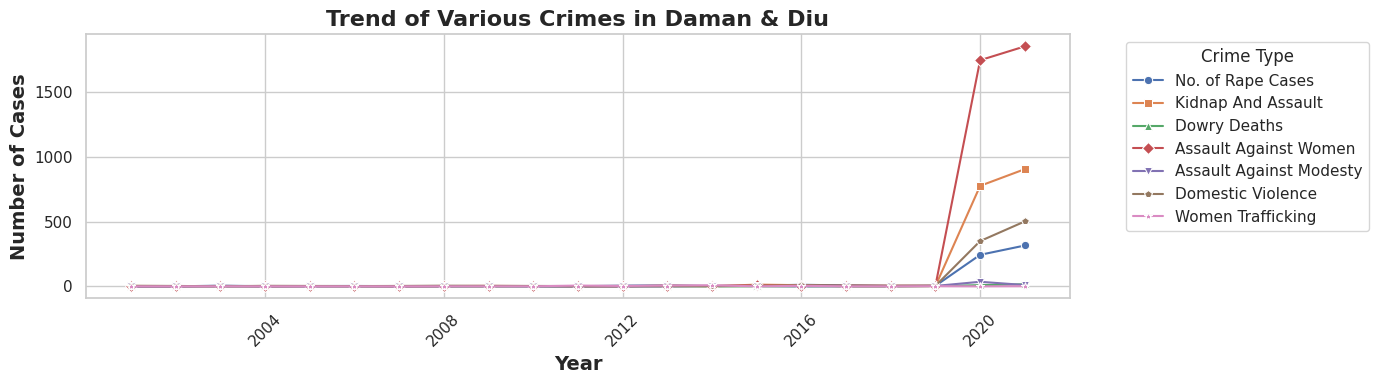

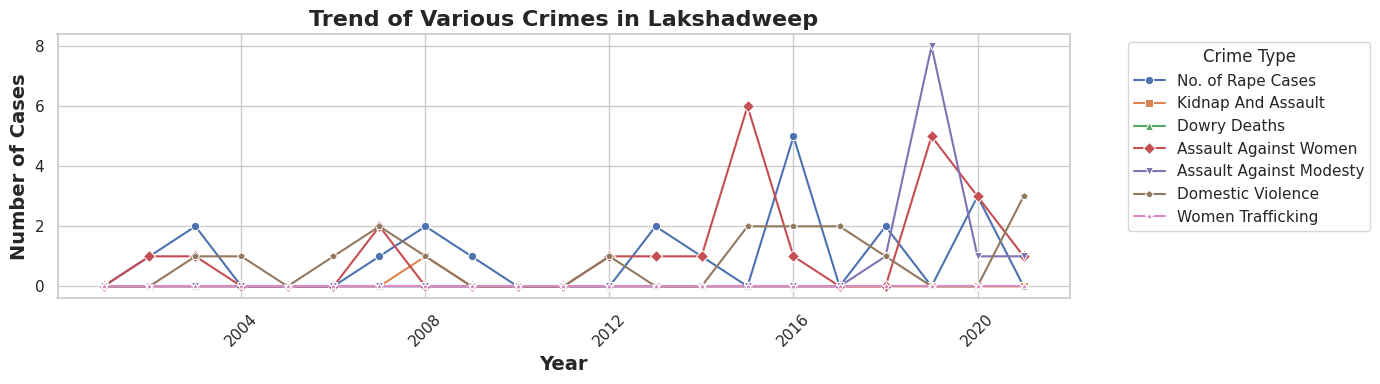

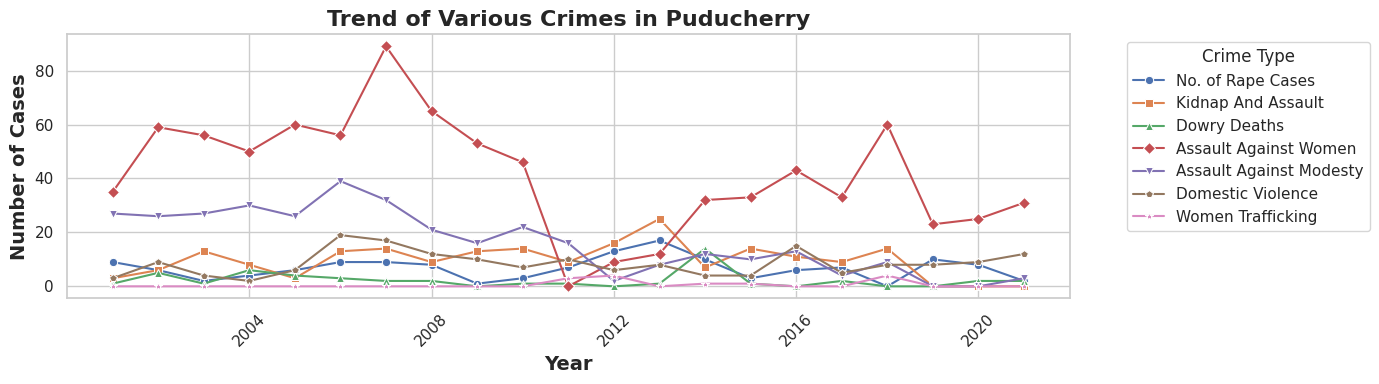

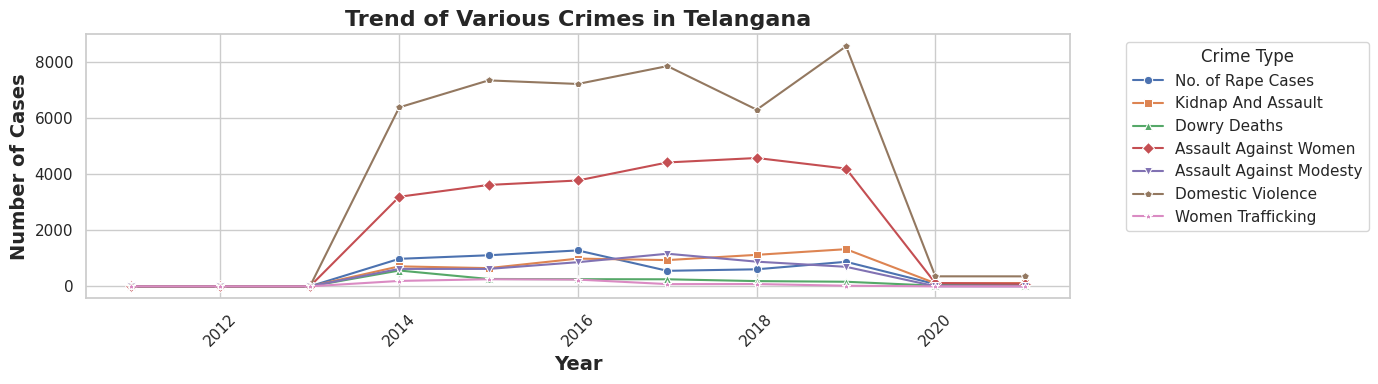

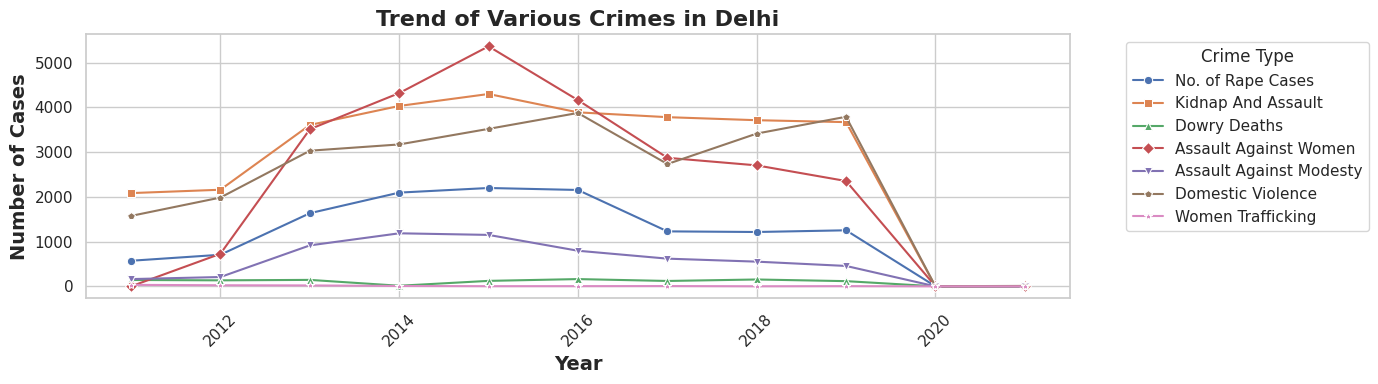

In [15]:
# Get list of unique states
states = df['State'].unique()

# Set the plot style and figure size
sns.set(style="whitegrid")

# Plot for each state
for state in states:
    state_data = df[df['State'] == state]

    plt.figure(figsize=(14, 4))
    # Plot each crime type
    sns.lineplot(data=state_data, x='Year', y='No. of Rape cases', label='No. of Rape Cases', marker='o')
    sns.lineplot(data=state_data, x='Year', y='Kidnap And Assault', label='Kidnap And Assault', marker='s')
    sns.lineplot(data=state_data, x='Year', y='Dowry Deaths', label='Dowry Deaths', marker='^')
    sns.lineplot(data=state_data, x='Year', y='Assault against women', label='Assault Against Women', marker='D')
    sns.lineplot(data=state_data, x='Year', y='Assault against modesty of women', label='Assault Against Modesty', marker='v')
    sns.lineplot(data=state_data, x='Year', y='Domestic violence', label='Domestic Violence', marker='p')
    sns.lineplot(data=state_data, x='Year', y='Women Trafficking', label='Women Trafficking', marker='*')

    # Customize the plot
    plt.title(f'Trend of Various Crimes in {state}', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Cases', fontsize=14, fontweight='bold')
    plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [16]:
# State Wise Crime Data
state_wise_crime_data = df.groupby('State')[['State', 'No. of Rape cases', 'Kidnap And Assault',
       'Dowry Deaths', 'Assault against women',
       'Assault against modesty of women', 'Domestic violence',
       'Women Trafficking']].sum()

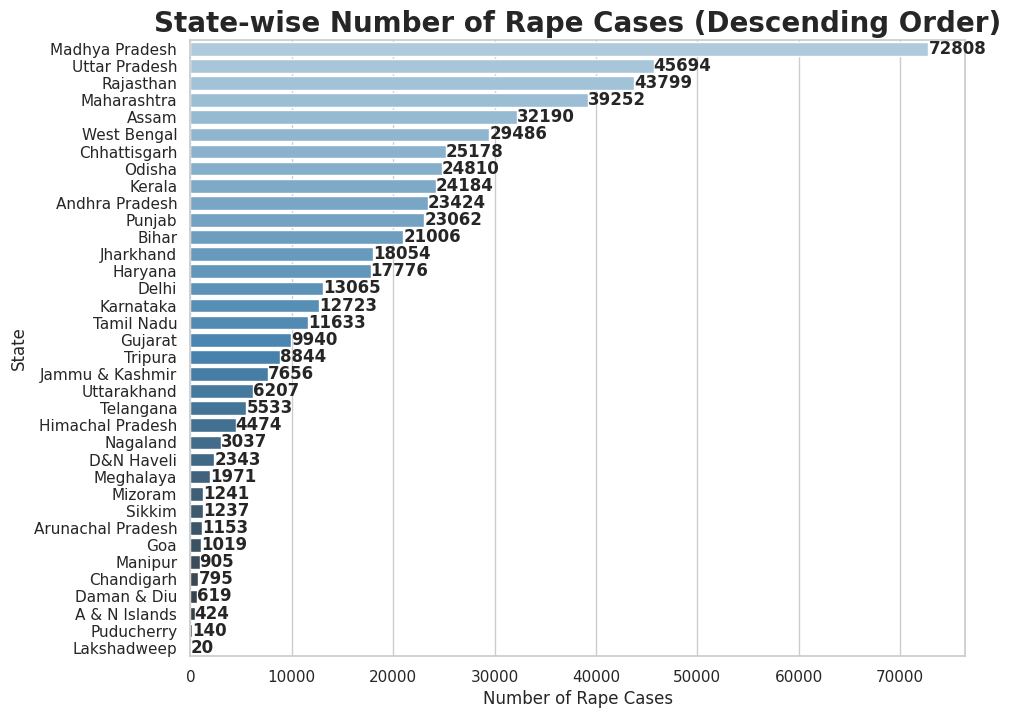

In [17]:
# State wise number of case
# Sorting the data in descending order by 'No. of Rape cases'
number_rape_case = state_wise_crime_data.sort_values('No. of Rape cases', ascending=False)

# Plotting the horizontal bar chart with seaborn
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=number_rape_case['No. of Rape cases'], y=number_rape_case.index, palette='Blues_d')

# Adding labels and title
plt.xlabel('Number of Rape Cases')
plt.ylabel('State')
plt.title(
    'State-wise Number of Rape Cases (Descending Order)',
    fontdict = {
        'font':'times new roman', 
        'fontsize': 20, 
        'fontweight': 'bold'
    }
)

# Annotating each bar with the exact value
for index, value in enumerate(number_rape_case['No. of Rape cases']):
    ax.text(
        value, 
        index, 
        f'{value}', 
        va='center',
        fontweight = 'bold'
    )

# Display the plot
plt.show()

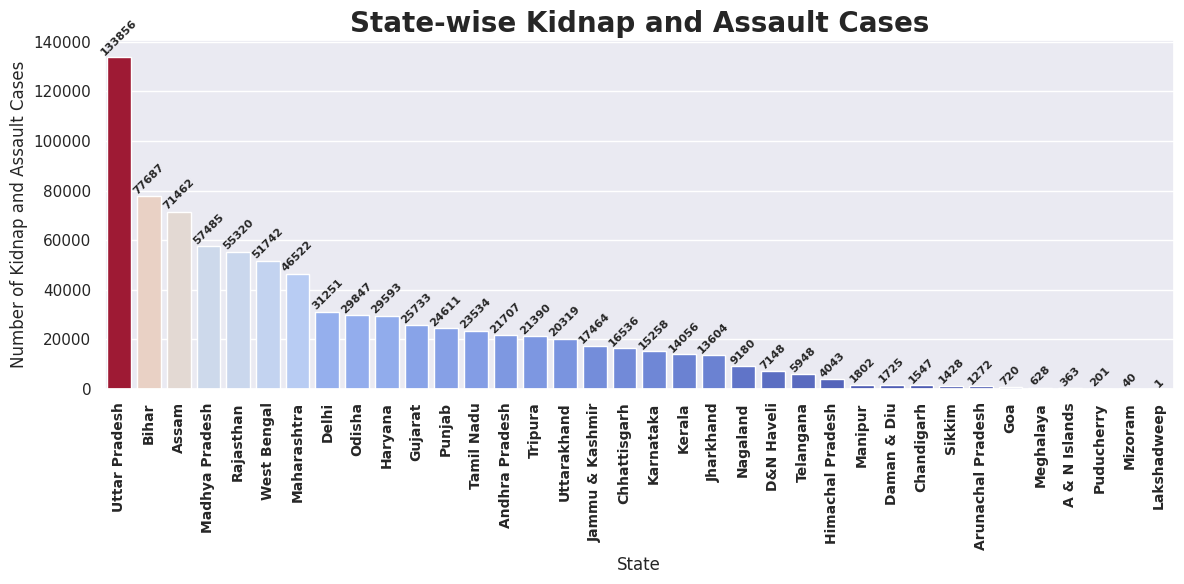

In [18]:
# State Wise Kidnap and Assault
kidnap_and_assault = state_wise_crime_data.sort_values('Kidnap And Assault', ascending = False)

# Normalize data for color mapping
norm = plt.Normalize(kidnap_and_assault['Kidnap And Assault'].min(), kidnap_and_assault['Kidnap And Assault'].max())
cmap = plt.get_cmap('coolwarm')  # You can choose any colormap you like

# Getting color values based on normalized data
colors = cmap(norm(kidnap_and_assault['Kidnap And Assault']))

# Visualize the data using a vertical bar chart
sns.set_theme()
plt.figure(figsize=(12, 6))  # Adjusted figure size
bars = sns.barplot(
    x=kidnap_and_assault.index,
    y=kidnap_and_assault['Kidnap And Assault'],
    palette=colors
)

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Number of Kidnap and Assault Cases')
plt.title(
    'State-wise Kidnap and Assault Cases',
    fontdict = {
        'font':'times new roman', 
        'fontsize': 20, 
        'fontweight': 'bold'
    }
)

# Rotating x-axis labels for better readability
plt.xticks(
    rotation=90, 
    fontsize=10,# Adjust font size if necessary
    fontweight = 'bold'
)  

# Annotate the data
for index, value in enumerate(kidnap_and_assault['Kidnap And Assault']):
    bars.text(
        index,
        value,
        f'{value}',
        va='bottom',  # Place the text above the bar
        ha='center',  # Center-align text
        fontsize=8,  # Adjust font size if necessary
        rotation = 45,
        fontdict = {
            'fontweight': 'bold'
        }
    )

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

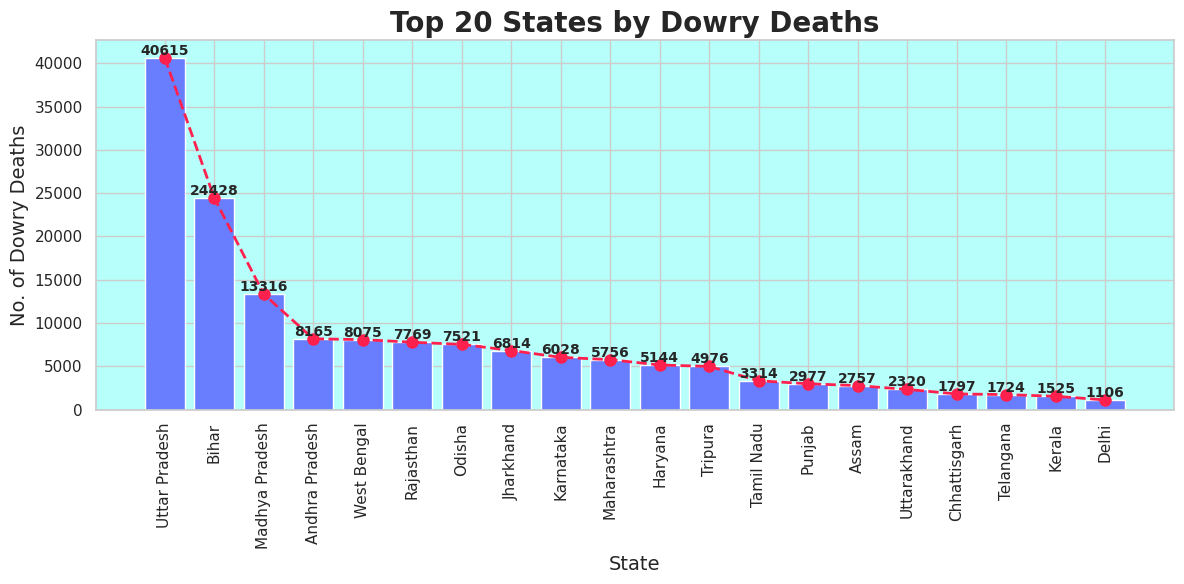

In [19]:
# Statewise Dowry Deaths
dowry_deaths = state_wise_crime_data['Dowry Deaths'].reset_index()
dowry_deaths.columns = ['State', 'No. of Dowry Deaths']

# Top 20 state for dowry deaths
top_20_states = dowry_deaths.sort_values('No. of Dowry Deaths', ascending = False).head(20)

# Set the plot style and figure size
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a vertical bar chart
bars = plt.bar(
    top_20_states['State'],
    top_20_states['No. of Dowry Deaths'],
    color= "#687EFF"
)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(
        x,
        yval,
        int(yval),
        va='bottom',  # Place the text above the bar
        ha='center',  # Center-align text
        fontsize=10,  # Adjust font size if necessary
        fontweight='bold'
    )

    # Plot a line for the Dowry Deaths
plt.plot(
    top_20_states['State'],
    top_20_states['No. of Dowry Deaths'],
    color='#FF204E',  # Line color
    marker='o',  # Marker style
    linestyle='--',  # Line style
    linewidth=2,  # Line width
    markersize=8  # Marker size
)

# Customize the layout
plt.title(
    'Top 20 States by Dowry Deaths', 
    fontdict = {
        'font':'times new roman', 
        'fontsize': 20, 
        'fontweight': 'bold'
    }
)

plt.xlabel('State', fontsize=14)
plt.ylabel('No. of Dowry Deaths', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.gca().set_facecolor('#B6FFFA')  # Background color for the plot

# Show the plot
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

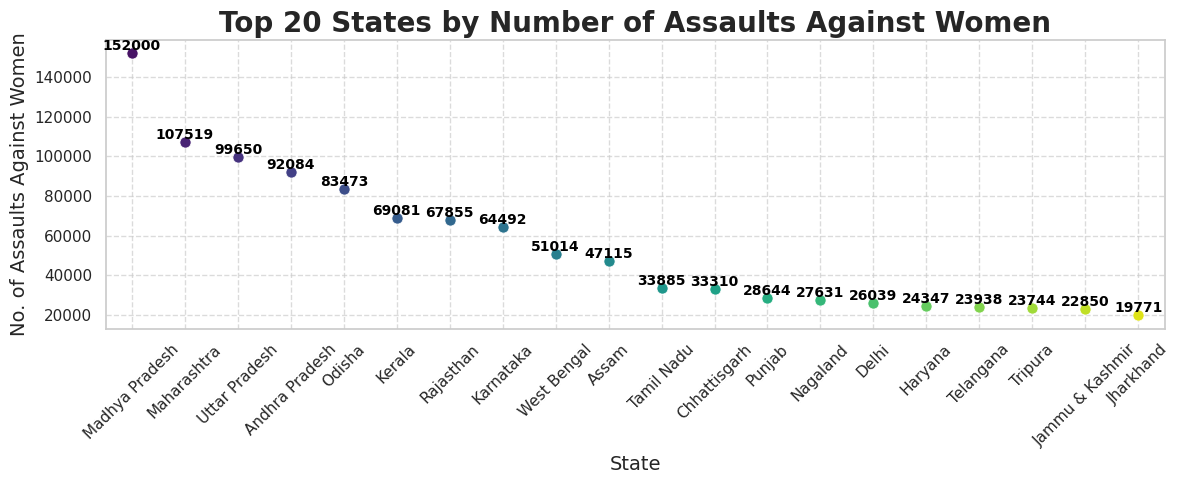

In [20]:
# Assault Againsts Women
assault_against_women = state_wise_crime_data['Assault against women'].reset_index()
assault_against_women.columns = ['State', 'No. of Assault against women']

# Top 20 state for assault against women
top_20_assault = assault_against_women.sort_values('No. of Assault against women', ascending = False).head(20)

# Set the plot style and figure size
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")

# Create a swarm plot
plot = sns.swarmplot(
    x='State',
    y='No. of Assault against women',
    data=top_20_assault,
    palette='viridis',  # Choose a color palette
    size=8,  # Adjust size of the points
    edgecolor='w',  # Edge color for the points
    linewidth=0.5
)

# Customize the plot
plt.title(
    'Top 20 States by Number of Assaults Against Women', 
    fontdict = {
        'font':'times new roman', 
        'fontsize': 20, 
        'fontweight': 'bold'
    }
)
plt.xlabel('State', fontsize=14)
plt.ylabel('No. of Assaults Against Women', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Annotate the data
for i in range(top_20_assault.shape[0]):
    plt.text(
        x=top_20_assault['State'].iloc[i],
        y=top_20_assault['No. of Assault against women'].iloc[i],
        s=f'{top_20_assault["No. of Assault against women"].iloc[i]}',
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=10,  # Font size of the text
        color='black',  # Color of the text
        weight='bold'  # Font weight of the text
    )
# Show the plot
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

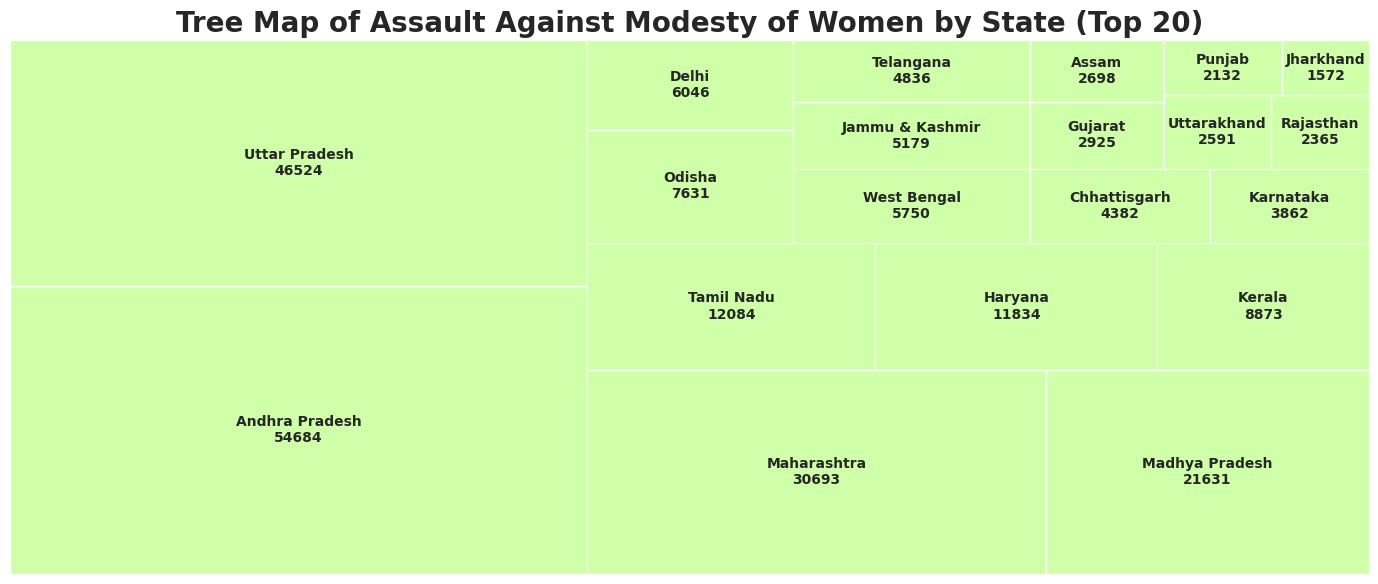

In [21]:
# Assault Agains Modesty of Women
againsts_modesty = state_wise_crime_data['Assault against modesty of women'].reset_index()
againsts_modesty.columns = ['State', 'No. of Assault against modesty of women']

# Top 20 state for Assault Agains Modesty of Women
top_20_against_modesty = againsts_modesty.sort_values('No. of Assault against modesty of women', ascending = False).head(20)

# Prepare data for the tree map
labels = top_20_against_modesty['State']
sizes = top_20_against_modesty['No. of Assault against modesty of women']

# Create a tree map
plt.figure(figsize=(14, 6))

ax = plt.gca()
squarify.plot(
    sizes=sizes,
    label=[f'{label}\n{size}' for label, size in zip(labels, sizes)],
    color="#C3FF93",
    alpha=0.8,
    pad=False,
    ax=ax,
    text_kwargs={'fontsize': 10, 'fontweight': 'bold'}
)

# Add title
plt.title(
    'Tree Map of Assault Against Modesty of Women by State (Top 20)', 
    fontdict = {
        'font':'times new roman', 
        'fontsize': 20, 
        'fontweight': 'bold'
    }
)

# Remove axis
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

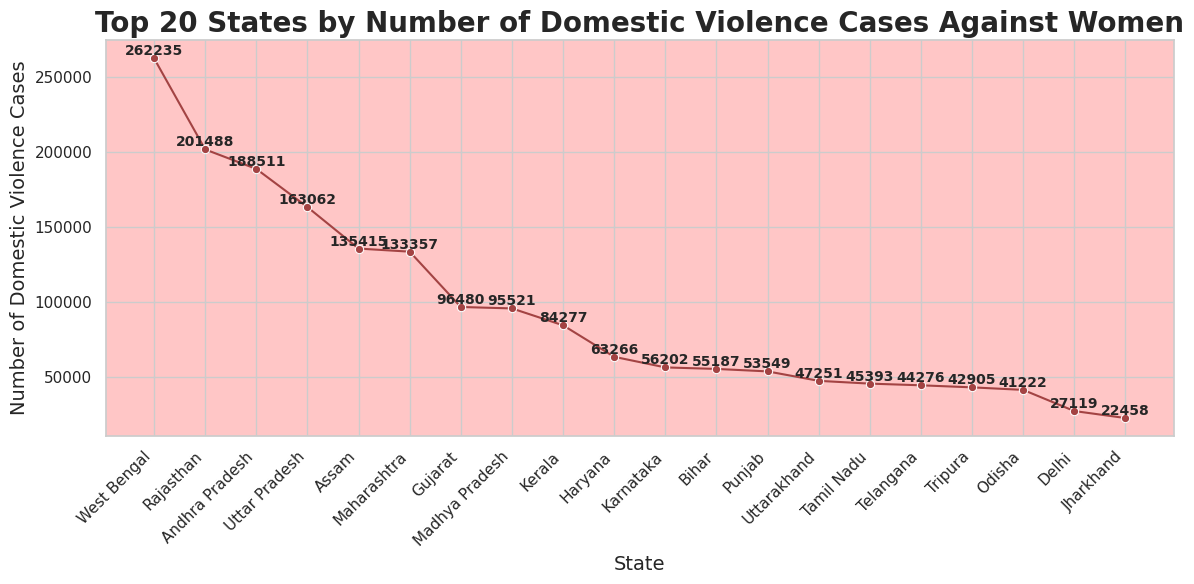

In [22]:
# Statewise Domestic violence
domestic_violence = state_wise_crime_data['Domestic violence'].reset_index()
domestic_violence.columns = ['State', 'No. of Domestic violence']

# Top 20 state for Domestic violence
top_20_states_by_domestic_violence = domestic_violence.sort_values('No. of Domestic violence', ascending = False).head(20)

# Plot a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='State',
    y='No. of Domestic violence',
    data=top_20_states_by_domestic_violence,
    marker='o',
    color = '#A34343'
)

# Customize the plot
plt.title(
    'Top 20 States by Number of Domestic Violence Cases Against Women', 
    fontdict = {
        'font':'times new roman', 
        'fontsize': 20, 
        'fontweight': 'bold'
    }
)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Domestic Violence Cases', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add annotations
for index, row in top_20_states_by_domestic_violence.iterrows():
    plt.text(
        x=row['State'], 
        y=row['No. of Domestic violence'],
        s=f'{row["No. of Domestic violence"]}',
        ha='center', 
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.gca().set_facecolor('#FFC6C6')
    
# Show the plot
plt.tight_layout()
plt.show()

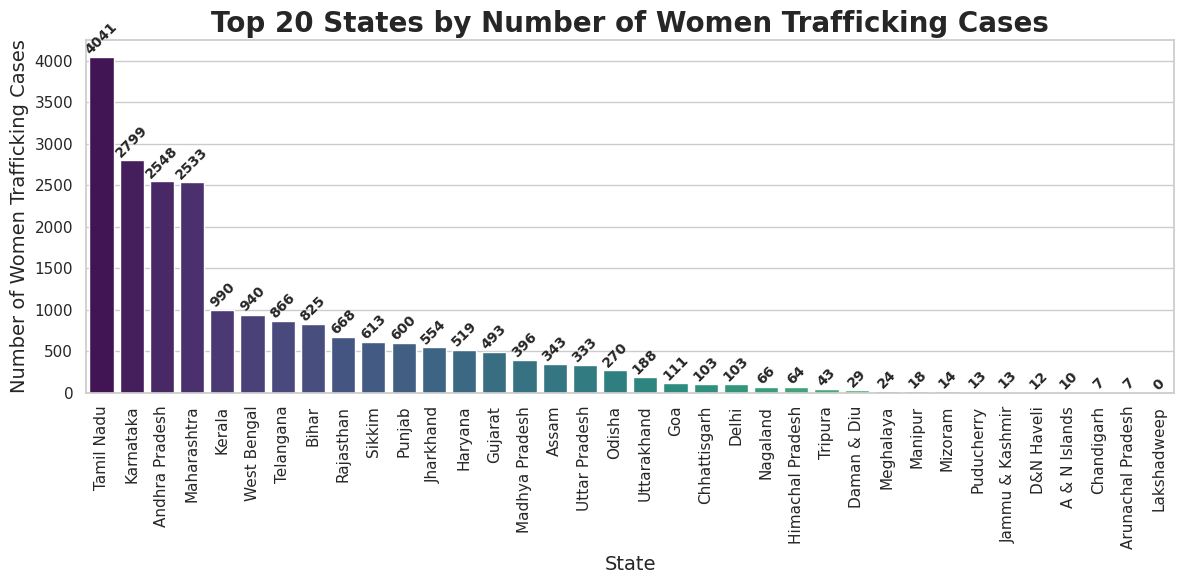

In [23]:
# Women Trafficking
women_trafficking = state_wise_crime_data['Women Trafficking'].reset_index()
women_trafficking.columns = ['State', 'Women Trafficking']

# Top 20 state for Domestic violence
top_20_states_by_women_trafficking = women_trafficking.sort_values('Women Trafficking', ascending = False)

# Create a vertical bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x='State',
    y='Women Trafficking',
    data=top_20_states_by_women_trafficking,
    palette='viridis'  # Choose a color palette
)

# Add data labels
for bar in bar_plot.patches:
    yval = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(
        x,
        yval,
        int(yval),
        va='bottom',  # Place the text above the bar
        ha='center',  # Center-align text
        fontsize=10,  # Adjust font size if necessary
        fontweight='bold',
        rotation = 45
    )

# Customize the plot
plt.title(
    'Top 20 States by Number of Women Trafficking Cases',
    fontdict = {
        'font':'times new roman', 
        'fontsize': 20, 
        'fontweight': 'bold'
    }
)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Women Trafficking Cases', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

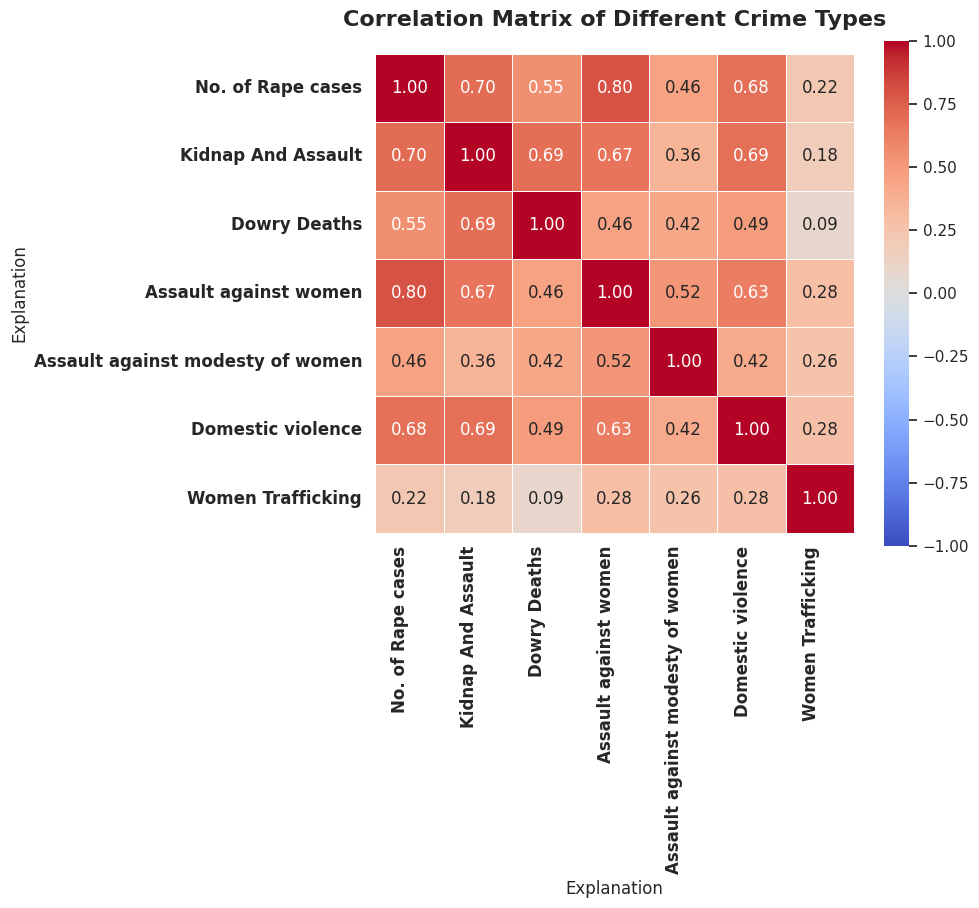

In [24]:
# Correlation Analysis
df_numerical = df[['No. of Rape cases', 'Kidnap And Assault',
       'Dowry Deaths', 'Assault against women',
       'Assault against modesty of women', 'Domestic violence',
       'Women Trafficking']]

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Set the plot style and figure size
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

# Create a heatmap with customizations
sns.heatmap(
    corr_matrix, 
    annot=True,        # Annotate each cell with the correlation coefficient
    fmt=".2f",         # Format the annotations to 2 decimal places
    cmap="coolwarm",   # Use the 'coolwarm' color palette
    vmin=-1, vmax=1,   # Set the value range for the heatmap colors
    linewidths=0.5,    # Add lines between cells for better readability
    square=True,       # Ensure each cell is square-shaped
    cbar_kws={"shrink": 0.75},  # Adjust the color bar size
    annot_kws={"size": 12}      # Adjust the size of the annotations
)

# Customize the plot further
plt.title(
    'Correlation Matrix of Different Crime Types', 
    fontsize=16, 
    fontweight='bold', 
    pad=20
)

plt.xticks(
    fontsize=12, 
    rotation=90, 
    ha="right", 
    fontweight = 'bold'
)

plt.yticks(
    fontsize=12, 
    rotation=0,
    fontweight = 'bold'
)  # Keep y-axis labels horizontal

# Show the plot
plt.tight_layout()
plt.show()